## 자전거 대여 수요 예측

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('train_bike.csv')
print(bike_df.shape)
bike_df.head(5)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [55]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [56]:
#날짜 데이터 분리
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])
bike_df['year'] = bike_df['datetime'].dt.year
bike_df['month'] = bike_df['datetime'].dt.month
bike_df.drop('datetime', axis=1, inplace=True)
bike_df.info()
#이제 전부 정수/실수로 구성되어있음 + 결측치 없음

#casual:미등록 사용자 대여수 / registerd:등록된 사용자 대여수 / count=causual+registered
bike_df.drop('casual', axis=1, inplace = True)
bike_df.drop('registered', axis=1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


In [57]:
#라벨 인코딩
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=156)
 
lr = LinearRegression()
lr.fit(X_train ,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 21465.253 , RMSE : 146.510


In [58]:
#원핫 인코딩
#더 줄어든 것을 볼 수 있음 ! 효과 있당 @_@
bike_df = pd.get_dummies(bike_df, columns=['holiday','workingday','season', 'weather', 'year', 'month'])

y_target = bike_df['count']
X_features_ohe = bike_df.drop(['count'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train ,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 20852.589 , RMSE : 144.404


In [59]:
#원핫인코딩 회귀상관계수
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_features_ohe.columns )
coeff.sort_values(ascending=False)

weather_4       104.5
season_4         49.2
month_9          44.7
year_2012        38.5
month_12         28.6
month_5          23.6
month_11         16.9
temp             11.0
month_1           8.4
holiday_0         6.2
month_2           5.4
month_10          3.7
season_1          3.1
atemp             1.2
month_4           1.0
windspeed         0.5
workingday_0     -0.0
workingday_1      0.0
humidity         -2.7
holiday_1        -6.2
season_2         -9.4
month_3         -10.7
weather_2       -25.0
month_8         -32.5
weather_1       -33.0
month_6         -34.1
year_2011       -38.5
season_3        -42.9
weather_3       -46.5
month_7         -55.2
dtype: float64

/Users/hyesu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

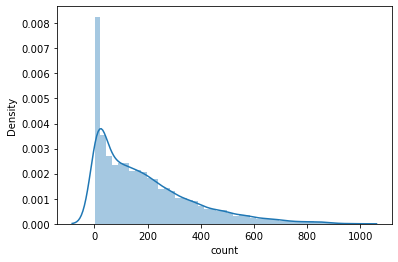

In [60]:
sns.distplot(y_target)

/Users/hyesu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

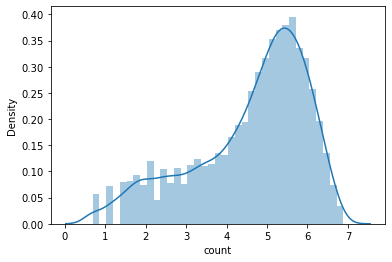

In [61]:
y_target_log = np.log1p(y_target)
sns.distplot(y_target_log)

In [62]:
y_target_log = np.log1p(y_target)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train)
y_preds = lr.predict(X_test)

#원래값으로 되돌리기
y_test_exp = np.expm1(y_test)
y_preds_exp = np.expm1(y_preds)

mse = mean_squared_error(y_test_exp, y_preds_exp)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 25603.217 , RMSE : 160.010


In [63]:
#릿지
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=156)

ridge = Ridge(alpha = 10)
ridge.fit(X_train ,y_train)
y_preds = ridge.predict(X_test)

y_test_exp = np.expm1(y_test)
y_preds_exp = np.expm1(y_preds)

mse = mean_squared_error(y_test_exp, y_preds_exp)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 25611.193 , RMSE : 160.035


In [64]:
# alpha값 하이퍼파라미터튜닝
# alpha 값을 변화시키면서 어떤게 제일 좋은건지
# 조건이 여러개일 땐 gridsearchCV이지만 alpha 하나여서 그냥 for문 돌림
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
# alpha 100 : 과적합을 제한할 수록 점점 더 값이 나아짐 --> alpha값이 커질수록 회귀 작아짐

for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    ridge.fit(X_train ,y_train)
    y_preds = ridge.predict(X_test)

    y_test_exp = np.expm1(y_test)
    y_preds_exp = np.expm1(y_preds)

    mse = mean_squared_error(y_test_exp, y_preds_exp)
    rmse = np.sqrt(mse)

    print('alpha가 {0}일 때, MSE : {1:.3f} , RMSE : {2:.3F}'.format(alpha,mse , rmse))

alpha가 0일 때, MSE : 25603.217 , RMSE : 160.010
alpha가 0.1일 때, MSE : 25603.297 , RMSE : 160.010
alpha가 1일 때, MSE : 25604.017 , RMSE : 160.013
alpha가 10일 때, MSE : 25611.193 , RMSE : 160.035
alpha가 100일 때, MSE : 25680.044 , RMSE : 160.250


In [65]:
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train , y_train)
    
    coeff = pd.Series(data=ridge.coef_, index=X_train.columns)    
    print('alpha {0} 일 때 회귀계수 :'.format(alpha))
    print(coeff.sort_values(ascending=False),'\n')
#혼자서 너무 튀는 회귀계수가 있으면 문제가 있는 것 -- alpha를 바꾸면서 과적합문제 조정 가능

alpha 0 일 때 회귀계수 :
year          0.390593
weather       0.100821
month         0.083228
atemp         0.042303
windspeed     0.009499
temp          0.009270
humidity     -0.024849
holiday      -0.036352
season       -0.062552
workingday   -0.073275
dtype: float64 

alpha 0.1 일 때 회귀계수 :
year          0.390573
weather       0.100817
month         0.083223
atemp         0.042303
windspeed     0.009499
temp          0.009270
humidity     -0.024849
holiday      -0.036332
season       -0.062537
workingday   -0.073269
dtype: float64 

alpha 1 일 때 회귀계수 :
year          0.390388
weather       0.100784
month         0.083178
atemp         0.042301
windspeed     0.009498
temp          0.009272
humidity     -0.024849
holiday      -0.036155
season       -0.062398
workingday   -0.073211
dtype: float64 

alpha 10 일 때 회귀계수 :
year          0.388553
weather       0.100449
month         0.082735
atemp         0.042286
windspeed     0.009495
temp          0.009293
humidity     -0.024847
holiday      -0.034

In [66]:
#라쏘
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=156)

lasso = Lasso(alpha = 1.0)
lasso.fit(X_train ,y_train)
y_preds = lasso.predict(X_test)

y_test_exp = np.expm1(y_test)
y_preds_exp = np.expm1(y_preds)

mse = mean_squared_error(y_test_exp, y_preds_exp)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 30079.825 , RMSE : 173.435


In [67]:
## 라쏘에서는 alpha가 작을수록 rmse가 더 작았음
# alpha값 하이퍼파라미터튜닝
alphas = [0.01, 0.07, 0.1, 0.5, 1, 3, 10]

# alphas list 값을 iteration하면서 alpha에 따른 rmse 구함.
for alpha in alphas :
    lasso = Lasso(alpha = alpha)
    
    lasso.fit(X_train ,y_train)
    y_preds = lasso.predict(X_test)

    y_test_exp = np.expm1(y_test)
    y_preds_exp = np.expm1(y_preds)

    mse = mean_squared_error(y_test_exp, y_preds_exp)
    rmse = np.sqrt(mse)

    print('alpha가 {0}일 때, MSE : {1:.3f} , RMSE : {2:.3F}'.format(alpha,mse , rmse))

alpha가 0.01일 때, MSE : 25819.566 , RMSE : 160.685
alpha가 0.07일 때, MSE : 27005.569 , RMSE : 164.334
alpha가 0.1일 때, MSE : 27755.470 , RMSE : 166.600
alpha가 0.5일 때, MSE : 28947.224 , RMSE : 170.139
alpha가 1일 때, MSE : 30079.825 , RMSE : 173.435
alpha가 3일 때, MSE : 34665.670 , RMSE : 186.187
alpha가 10일 때, MSE : 40495.671 , RMSE : 201.235


In [68]:
coeff_df = pd.DataFrame()
for alpha in alphas :
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train , y_train)
    
    coeff = pd.Series(data=lasso.coef_, index=X_train.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
sort_column = 'alpha:'+str(alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

# 릿지와 달리 라쏘는 0을 만들 수 있기 때문에 회귀에서 0값이 나오는 것을 알 수 있음
# 하다보니 중요하지 않다고 느껴져서 학습모델이 피처를 제거하는 행위임.
# 우리가 피처를 제거해가면서 비교하지 않아도 라쏘는 알아서 해줌 : 장단점

# 그래서 보통 alpha를 키우면 피처를 너무 날려서 rmse가 안좋아지는 경향이 있음

,alpha:0.01,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3,alpha:10
year,0.351924,0.112558,0.000000,0.000000,0.000000,0.000000,0.0
weather,0.069081,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.0
month,0.062328,0.055908,0.052981,0.016268,0.000000,0.000000,0.0
atemp,0.041594,0.042371,0.042891,0.049277,0.044279,0.017058,0.0
temp,0.009920,0.009420,0.009048,0.000000,0.000000,0.000000,0.0
windspeed,0.009491,0.008457,0.007587,0.000500,0.000000,0.000000,0.0
season,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
holiday,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.0
workingday,-0.021370,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0
humidity,-0.024396,-0.023674,-0.023827,-0.022444,-0.020642,-0.015724,-0.0


In [69]:
#엘라스틱넷
from sklearn.linear_model import ElasticNet

alphas = [0.01, 0.07, 0.1, 0.5, 1, 3, 5]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    elsnet = ElasticNet(alpha = alpha, l1_ratio=0.7)
    
    elsnet.fit(X_train ,y_train)
    y_preds = elsnet.predict(X_test)

    y_test_exp = np.expm1(y_test)
    y_preds_exp = np.expm1(y_preds)

    mse = mean_squared_error(y_test_exp, y_preds_exp)
    rmse = np.sqrt(mse)

    print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 25784.320 , RMSE : 160.575
MSE : 26590.507 , RMSE : 163.066
MSE : 27079.085 , RMSE : 164.557
MSE : 28476.613 , RMSE : 168.750
MSE : 29564.828 , RMSE : 171.944
MSE : 32532.565 , RMSE : 180.368
MSE : 35942.804 , RMSE : 189.586


In [70]:
coeff_df = pd.DataFrame()
for alpha in alphas :
    elsnet = ElasticNet(alpha = alpha, l1_ratio=0.7)
    elsnet.fit(X_train, y_train)
    
    coeff = pd.Series(data=elsnet.coef_, index=X_train.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
sort_column = 'alpha:'+str(alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

#라쏘를 사용하기 때문에 0이 되는 회귀계수가 존재함 (피처필터링)
#그치만 라쏘보다는 피처필터링을 덜 엄격하게 함
#라쏘보다 더 좋은 rmse를 도출

,alpha:0.01,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3,alpha:5
year,0.359240,0.181913,0.100372,0.000000,0.000000,0.00000,0.000000
weather,0.077863,0.000000,0.000000,0.000000,0.000000,0.00000,-0.000000
month,0.062655,0.057828,0.055733,0.029647,0.000000,0.00000,0.000000
atemp,0.041449,0.041558,0.041891,0.045157,0.048164,0.02895,0.010049
temp,0.010110,0.010206,0.009987,0.005240,0.000000,0.00000,0.000000
windspeed,0.009484,0.009014,0.008394,0.003077,0.000000,0.00000,0.000000
season,-0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
holiday,-0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-0.000000
humidity,-0.024521,-0.023581,-0.023693,-0.022934,-0.021366,-0.01790,-0.014440
workingday,-0.035237,-0.000000,-0.000000,-0.000000,-0.000000,-0.00000,-0.000000


In [71]:
#트리기반 회귀
# 결정트리 기반, 랜덤포레스트 기반, xgboost 기반, lightgbm 기반이 있음
# 분류에서도 기능이 좋지만 회귀에서도 기능이 좋음
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

In [ ]:
#회귀트리 진짜 많이 쓰임 rmse가 되게 낮게 나와서
#튜닝할 수 있는 방법도 많아서 성능을 더 높일 수 있음
from sklearn.metrics import mean_squared_error

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    
    y_test_exp = np.expm1(y_test)
    y_preds_exp = np.expm1(y_preds)
    
    mse = mean_squared_error(y_test_exp, y_preds_exp)
    rmse = mse**(1/2)
    
    print(model.__class__.__name__,'회귀 모델의 rmse 값:', rmse)

DecisionTreeRegressor 회귀 모델의 rmse 값: 163.27940410023842
RandomForestRegressor 회귀 모델의 rmse 값: 141.64631565753422
GradientBoostingRegressor 회귀 모델의 rmse 값: 146.4078856203862
